In [5]:
## x,y값샘플제작

손든횟수=[1,2,3,1,1,3,1,3]
성적=[90,100,80,100,88,77,55,85]

import pandas as pd
df=pd.DataFrame(dict({'손든횟수':손든횟수, '성적':성적}))
df

,손든횟수,성적
0,1,90
1,2,100
2,3,80
3,1,100
4,1,88
5,3,77
6,1,55
7,3,85


### Part1. [단순선형회귀-최소제곱법계산식]
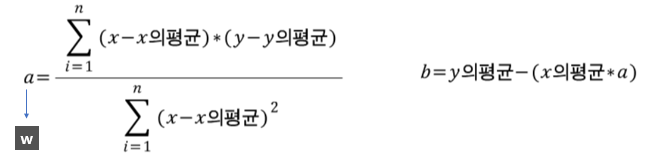

In [25]:
x=df['손든횟수'].values
y=df['성적'].values
x,y

(array([1, 2, 3, 1, 1, 3, 1, 3], dtype=int64),
 array([ 90, 100,  80, 100,  88,  77,  55,  85], dtype=int64))

In [23]:
xData=np.reshape(x,(-1,1))
xData

array([[1],
       [2],
       [3],
       [1],
       [1],
       [3],
       [1],
       [3]], dtype=int64)

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(xData,y)
model.coef_, model.intercept_


(array([-0.96363636]), 86.18181818181819)

### -- [작업1] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
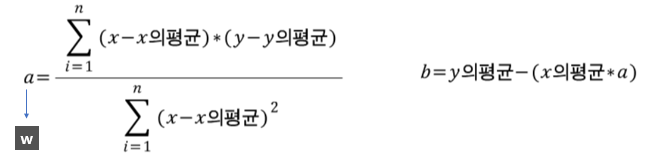

In [32]:
coef=np.sum((x-np.mean(x))*(y-np.mean(y))) / (np.sum((x-np.mean(x))**2))
coef

-0.9636363636363636

In [33]:
np.mean(y)-(np.mean(x)*coef)

86.18181818181819

### -- [작업2] model.coef_와 model.intercept_값을 아래 수식으로 직접 계산해봅니다. --
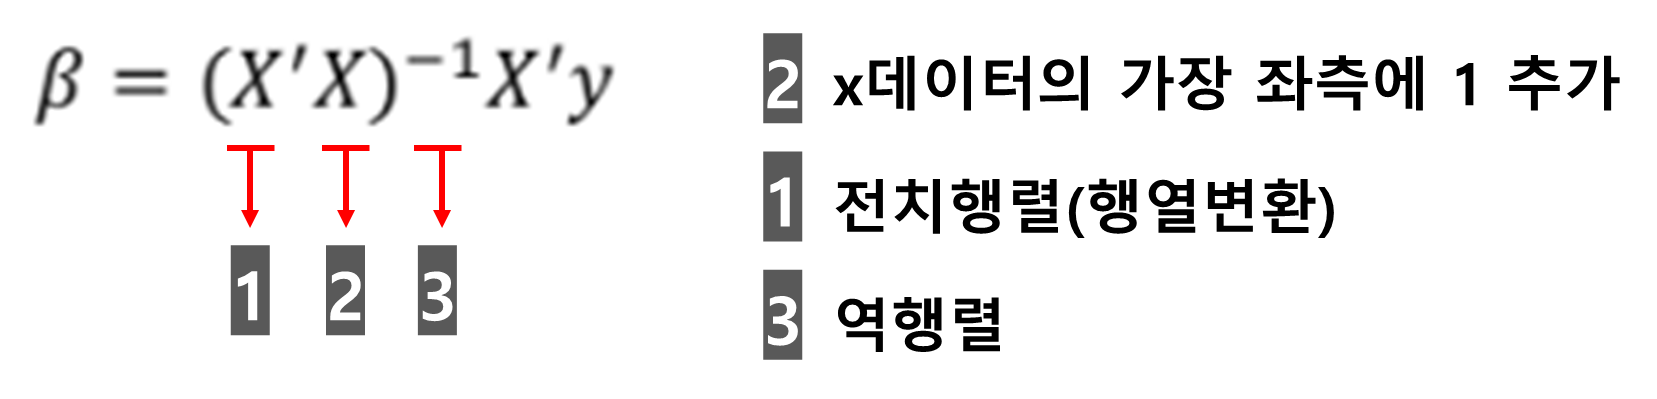

In [48]:
newX=np.c_[np.ones(len(x)),x]
newX

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 1.],
       [1., 1.],
       [1., 3.],
       [1., 1.],
       [1., 3.]])

In [52]:
# 위의수식 newX의전치행렬*newX
계산1=np.dot(newX.T,newX)
계산1

array([[ 8., 15.],
       [15., 35.]])

In [53]:
#계산1의 역행렬
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1)  
계산1역행렬

array([[ 0.63636364, -0.27272727],
       [-0.27272727,  0.14545455]])

In [54]:
# 최종결과
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

array([86.18181818, -0.96363636])

### Part2. [다중선형회귀_최소제곱법계산식]
- 위의 작업2방법으로 계산합니다.

In [56]:
df['공지확인횟수']=[1,2,20,7,8,1,2,3]
df

,손든횟수,성적,공지확인횟수
0,1,90,1
1,2,100,2
2,3,80,20
3,1,100,7
4,1,88,8
5,3,77,1
6,1,55,2
7,3,85,3


In [58]:
x=df[['손든횟수','공지확인횟수']].values
y=df['성적'].values


In [68]:
# 사이킷런 모델에서 계산된값
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()
model.fit(x,y)
model.coef_, model.intercept_


(array([-1.17727639,  0.12771958]), 85.87993553585818)

In [66]:
# 직접 계산한 최소제곱법
newX=np.c_[np.ones(len(x)),x]
계산1=np.dot(newX.T,newX)
np.random.seed(0)
계산1역행렬= np.linalg.inv(계산1) 
계산2=np.dot(계산1역행렬,newX.T)
계산3=np.dot(계산2,y)
계산3   ##첫번째값은 b, 두번째는 x1, 세번째는 x2

# 이값으로 해석하면 손든횟수가 많을수록 성적은 -1배 감소한다.
# 이값으로 해석하면 공지확인횟수가 많을수혹 성적은 0.1배 증가한다.


array([85.87993554, -1.17727639,  0.12771958])